# PyCaret Regression


Machine Learning (ML) considered as a subset of Artificial Intelligence (AI) is the scientific study of algorithms and statistical models that computer systems use to effectively perform a specific task without using explicit instructions, relying on patterns and inference instead. PyCaret's Regression Module is a supervised machine learning module that is used for estimating the relationships between a dependent variable (Target) and one or more independent variables (Features). On this project the typical workflow of PyCaret’s Regression module steps which are:

Setup  ➡️   Compare Models   ➡️ Analyze Model    ➡️ Prediction        ➡️ Save Model

 will be followed to experiment and come up with the best regression model that predicts the alcohol on the Red Wine Quality Data Set, available on the UCI machine learning repository (https://archive.ics.uci.edu/ml/datasets/wine+quality). This work will demonstrate how experimenting with different preprocessing options and observing their impact on model performance, leads to creating best model for the problem in hand.


In [1]:
# Getting the Red Wine Quality Data set from UCI mahcine learning repository and unziping it.
!wget -q https://archive.ics.uci.edu/static/public/186/wine+quality.zip -O red_wine.zip
!unzip -q red_wine.zip

replace winequality-red.csv? [y]es, [n]o, [A]ll, [N]one, [r]ename: n
replace winequality-white.csv? [y]es, [n]o, [A]ll, [N]one, [r]ename: n
replace winequality.names? [y]es, [n]o, [A]ll, [N]one, [r]ename: n


# **Exploratory Data Analysis**

In [2]:
# Reading the red wine quality csv file and see first 10 rows of the dataset.
import pandas as pd
dataset = pd.read_csv('/content/winequality-red.csv',delimiter=";")
dataset.head(10)


,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
5,7.4,0.66,0.00,1.8,0.075,13.0,40.0,0.9978,3.51,0.56,9.4,5
6,7.9,0.60,0.06,1.6,0.069,15.0,59.0,0.9964,3.30,0.46,9.4,5
7,7.3,0.65,0.00,1.2,0.065,15.0,21.0,0.9946,3.39,0.47,10.0,7
8,7.8,0.58,0.02,2.0,0.073,9.0,18.0,0.9968,3.36,0.57,9.5,7
9,7.5,0.50,0.36,6.1,0.071,17.0,102.0,0.9978,3.35,0.80,10.5,5


In [3]:
dataset.shape

(1599, 12)

In [4]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1599 non-null   float64
 1   volatile acidity      1599 non-null   float64
 2   citric acid           1599 non-null   float64
 3   residual sugar        1599 non-null   float64
 4   chlorides             1599 non-null   float64
 5   free sulfur dioxide   1599 non-null   float64
 6   total sulfur dioxide  1599 non-null   float64
 7   density               1599 non-null   float64
 8   pH                    1599 non-null   float64
 9   sulphates             1599 non-null   float64
 10  alcohol               1599 non-null   float64
 11  quality               1599 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 150.0 KB


In [5]:
dataset.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000
mean,8.319637,0.527821,0.270976,2.538806,0.087467,15.874922,46.467792,0.996747,3.311113,0.658149,10.422983,5.636023
std,1.741096,0.179060,0.194801,1.409928,0.047065,10.460157,32.895324,0.001887,0.154386,0.169507,1.065668,0.807569
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.210000,0.550000,9.500000,5.000000
50%,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996750,3.310000,0.620000,10.200000,6.000000
75%,9.200000,0.640000,0.420000,2.600000,0.090000,21.000000,62.000000,0.997835,3.400000,0.730000,11.100000,6.000000
max,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000


In [6]:
dataset.nunique()


fixed acidity            96
volatile acidity        143
citric acid              80
residual sugar           91
chlorides               153
free sulfur dioxide      60
total sulfur dioxide    144
density                 436
pH                       89
sulphates                96
alcohol                  65
quality                   6
dtype: int64

In [7]:
dataset['alcohol'].unique()

array([ 9.4       ,  9.8       , 10.        ,  9.5       , 10.5       ,
        9.2       ,  9.9       ,  9.1       ,  9.3       ,  9.        ,
        9.7       , 10.1       , 10.6       ,  9.6       , 10.8       ,
       10.3       , 13.1       , 10.2       , 10.9       , 10.7       ,
       12.9       , 10.4       , 13.        , 14.        , 11.5       ,
       11.4       , 12.4       , 11.        , 12.2       , 12.8       ,
       12.6       , 12.5       , 11.7       , 11.3       , 12.3       ,
       12.        , 11.9       , 11.8       ,  8.7       , 13.3       ,
       11.2       , 11.6       , 11.1       , 13.4       , 12.1       ,
        8.4       , 12.7       , 14.9       , 13.2       , 13.6       ,
       13.5       , 10.03333333,  9.55      ,  8.5       , 11.06666667,
        9.56666667, 10.55      ,  8.8       , 13.56666667, 11.95      ,
        9.95      ,  9.23333333,  9.25      ,  9.05      , 10.75      ])

In [8]:
dataset.isnull().sum()

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

<AxesSubplot: >

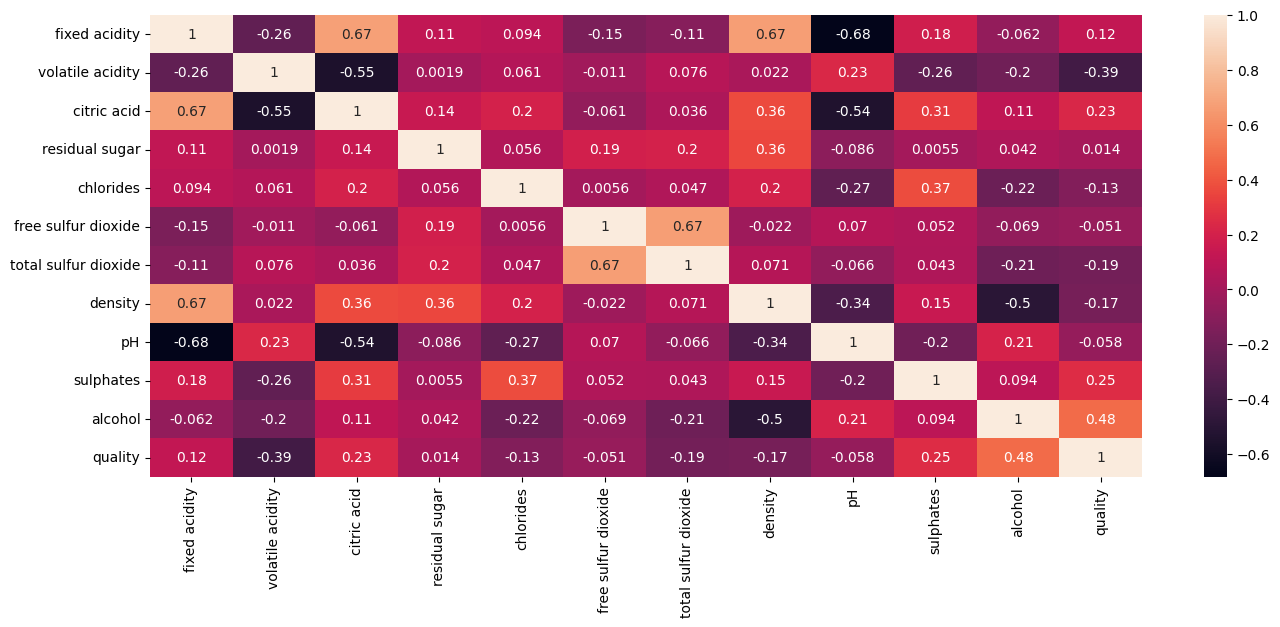

In [9]:
#correlation
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt


#seaborn heatmap method
plt.figure(figsize=[16,6])
sns.heatmap(dataset.corr(), annot=True)



# **Installing PyCaret**

In [11]:
# Installing PyCaret Fully
!pip install pycaret[full]

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 484.7/484.7 kB 6.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 81.9/81.9 kB 10.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 79.9/79.9 MB 11.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 11.8/11.8 MB 99.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 73.4/73.4 kB 8.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.1/2.1 MB 77.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 160.5/160.5 kB 17.7 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 106.8/106.8 kB 12.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 34.4/34.4 MB 43.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 17.1/17.1 MB 71.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 44.0/44.0 kB 5.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 101.8/101.8 kB 12.2 M

In [10]:
# Checking the version of it
import pycaret
pycaret.__version__

'3.2.0'

# **All the exploratory data anylisis can be reported using pandas profiling**

In [ ]:
from pandas_profiling import ProfileReport
# run profile
profile = ProfileReport(dataset, title = 'Report - Pandas Profilling', html={'style': {'full_width': True}})
profile

Output hidden; open in https://colab.research.google.com to view.

What the EDA shows is that there are outliers and needs normalization as total sulphur dioxide and free suphur dioxide are not scaled. there are two outliers in total suphur dioxide.

In [11]:
# showing the duplicated rows
duplicate_rows = dataset.duplicated()
dataset[duplicate_rows]

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
4,7.4,0.700,0.00,1.90,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
11,7.5,0.500,0.36,6.10,0.071,17.0,102.0,0.99780,3.35,0.80,10.5,5
27,7.9,0.430,0.21,1.60,0.106,10.0,37.0,0.99660,3.17,0.91,9.5,5
40,7.3,0.450,0.36,5.90,0.074,12.0,87.0,0.99780,3.33,0.83,10.5,5
65,7.2,0.725,0.05,4.65,0.086,4.0,11.0,0.99620,3.41,0.39,10.9,5
...,...,...,...,...,...,...,...,...,...,...,...,...
1563,7.2,0.695,0.13,2.00,0.076,12.0,20.0,0.99546,3.29,0.54,10.1,5
1564,7.2,0.695,0.13,2.00,0.076,12.0,20.0,0.99546,3.29,0.54,10.1,5
1567,7.2,0.695,0.13,2.00,0.076,12.0,20.0,0.99546,3.29,0.54,10.1,5
1581,6.2,0.560,0.09,1.70,0.053,24.0,32.0,0.99402,3.54,0.60,11.3,5


In [13]:
# dropping the duplicate rows
newdataset=dataset.drop_duplicates()

In [15]:
newdataset.shape

newdataset


,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
1,7.8,0.880,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8,5
2,7.8,0.760,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8,5
3,11.2,0.280,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8,6
5,7.4,0.660,0.00,1.8,0.075,13.0,40.0,0.99780,3.51,0.56,9.4,5
...,...,...,...,...,...,...,...,...,...,...,...,...
1593,6.8,0.620,0.08,1.9,0.068,28.0,38.0,0.99651,3.42,0.82,9.5,6
1594,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5,5
1595,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2,6
1597,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2,5


# **PyCaret Setting the Environment**

In [16]:
# import pycaret regression and init setup
from pycaret.regression import *
#exprience 1 with few preprocessing much sticking to the defaults, i will also log all my experiments
exp1=RegressionExperiment()
exp1.setup(newdataset, target = 'alcohol',session_id=123, train_size=0.7,log_experiment=True, experiment_name="experiment_1")


,Description,Value
0,Session id,123
1,Target,alcohol
2,Target type,Regression
3,Original data shape,"(1359, 12)"
4,Transformed data shape,"(1359, 12)"
5,Transformed train set shape,"(951, 12)"
6,Transformed test set shape,"(408, 12)"
7,Numeric features,11
8,Preprocess,True
9,Imputation type,simple


2023/11/22 22:12:37 INFO mlflow.tracking.fluent: Experiment with name 'experiment_1' does not exist. Creating a new experiment.


In [17]:
#experimenting with some preprocessing options such as:
#zscore normalization, removing outliers,feture selection, removing_multicollinearity,
exp2=RegressionExperiment()
exp2.setup(newdataset, target = 'alcohol', session_id = 123 ,train_size=0.7, remove_outliers=True, profile=True, normalize=True, normalize_method='zscore',feature_selection=True, remove_multicollinearity=True,log_experiment=True, experiment_name="experiment_2")

[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000250 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 833
[LightGBM] [Info] Number of data points in the train set: 903, number of used features: 11
[LightGBM] [Info] Start training from score 10.417903


,Description,Value
0,Session id,123
1,Target,alcohol
2,Target type,Regression
3,Original data shape,"(1359, 12)"
4,Transformed data shape,"(1311, 3)"
5,Transformed train set shape,"(903, 3)"
6,Transformed test set shape,"(408, 3)"
7,Numeric features,11
8,Preprocess,True
9,Imputation type,simple


Loading profile... Please Wait!


2023/11/22 22:13:36 INFO mlflow.tracking.fluent: Experiment with name 'experiment_2' does not exist. Creating a new experiment.


In [18]:
# experiment while ignoring quality as it has strong correlation with alcohol and see how the model would perform with out the quality, as it seems some non-linear dependency with the other features other than quality i will experiment by  adding polynomial features
#and instead of normalization experiment with transformation
exp3=RegressionExperiment()
exp3.setup(newdataset, ignore_features="quality", target = 'alcohol', session_id = 123 ,train_size=0.7, remove_outliers=True, profile=True, transformation=True, polynomial_features=True,log_experiment=True, experiment_name="experiment_3")


,Description,Value
0,Session id,123
1,Target,alcohol
2,Target type,Regression
3,Original data shape,"(1359, 12)"
4,Transformed data shape,"(1312, 66)"
5,Transformed train set shape,"(904, 66)"
6,Transformed test set shape,"(408, 66)"
7,Ignore features,7
8,Numeric features,10
9,Preprocess,True


Loading profile... Please Wait!


2023/11/22 22:16:37 INFO mlflow.tracking.fluent: Experiment with name 'experiment_3' does not exist. Creating a new experiment.


In [19]:
# experimenting only with removing outliers and normalization only.
exp4=RegressionExperiment()
exp4.setup(newdataset, target = 'alcohol', session_id = 123 ,train_size=0.7, remove_outliers=True, profile=True, normalize=True, normalize_method='zscore',log_experiment=True, experiment_name="experiment_4")

,Description,Value
0,Session id,123
1,Target,alcohol
2,Target type,Regression
3,Original data shape,"(1359, 12)"
4,Transformed data shape,"(1311, 12)"
5,Transformed train set shape,"(903, 12)"
6,Transformed test set shape,"(408, 12)"
7,Numeric features,11
8,Preprocess,True
9,Imputation type,simple


Loading profile... Please Wait!


2023/11/22 22:19:52 INFO mlflow.tracking.fluent: Experiment with name 'experiment_4' does not exist. Creating a new experiment.


# **Compare Models**

In [20]:
# compare baseline models and i will keep the top three models from each experiment
Top3_exp1 = exp1.compare_models(n_select=3)

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE,TT (Sec)
catboost,CatBoost Regressor,0.3856,0.2838,0.5270,0.7581,0.0449,0.0365,2.5240
lightgbm,Light Gradient Boosting Machine,0.4042,0.3174,0.5581,0.7286,0.0475,0.0382,0.2410
gbr,Gradient Boosting Regressor,0.4199,0.3173,0.5604,0.7269,0.0479,0.0398,0.2150
xgboost,Extreme Gradient Boosting,0.4224,0.3395,0.5763,0.7096,0.0490,0.0399,0.1510
et,Extra Trees Regressor,0.4327,0.3504,0.5863,0.6997,0.0503,0.0411,0.5090
lr,Linear Regression,0.4602,0.3546,0.5935,0.6934,0.0516,0.0441,1.0150
lar,Least Angle Regression,0.4602,0.3546,0.5935,0.6934,0.0516,0.0441,0.0280
rf,Random Forest Regressor,0.4435,0.3633,0.5982,0.6899,0.0511,0.0421,0.7740
ada,AdaBoost Regressor,0.5653,0.4880,0.6967,0.5807,0.0601,0.0544,0.2650
dt,Decision Tree Regressor,0.6045,0.7301,0.8501,0.3670,0.0728,0.0573,0.0310


Processing:   0%|          | 0/87 [00:00<?, ?it/s]

In [21]:
Top3_exp2=exp2.compare_models(n_select=3,sort="R2")

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE,TT (Sec)
gbr,Gradient Boosting Regressor,0.6113,0.6449,0.7999,0.4473,0.0686,0.0581,0.4180
knn,K Neighbors Regressor,0.6176,0.6618,0.8095,0.4318,0.0694,0.0585,0.3660
catboost,CatBoost Regressor,0.6246,0.6815,0.8234,0.4136,0.0706,0.0593,1.2810
ada,AdaBoost Regressor,0.6695,0.6873,0.8239,0.4135,0.0711,0.0646,0.3770
lightgbm,Light Gradient Boosting Machine,0.6305,0.6927,0.8283,0.4048,0.0709,0.0598,1.1290
br,Bayesian Ridge,0.6732,0.7177,0.8432,0.3846,0.0726,0.0641,0.3980
ridge,Ridge Regression,0.6732,0.7179,0.8433,0.3844,0.0726,0.0641,0.3820
lr,Linear Regression,0.6731,0.7180,0.8433,0.3842,0.0726,0.0641,0.4210
lar,Least Angle Regression,0.6731,0.7180,0.8433,0.3842,0.0726,0.0641,0.6940
huber,Huber Regressor,0.6714,0.7283,0.8490,0.3749,0.0732,0.0637,0.7190


Processing:   0%|          | 0/87 [00:00<?, ?it/s]

In [ ]:
Top3_exp3=exp3.compare_models(n_select=3,sort="R2")

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE,TT (Sec)
catboost,CatBoost Regressor,0.3988,0.3136,0.5531,0.7333,0.0471,0.0378,18.5990
lightgbm,Light Gradient Boosting Machine,0.4103,0.3228,0.5630,0.7233,0.0483,0.0391,3.6440
et,Extra Trees Regressor,0.4178,0.3324,0.5692,0.7171,0.0488,0.0399,1.6620
gbr,Gradient Boosting Regressor,0.4312,0.3446,0.5801,0.7065,0.0497,0.0411,2.0390
rf,Random Forest Regressor,0.4440,0.3597,0.5947,0.6906,0.0509,0.0424,3.6970
xgboost,Extreme Gradient Boosting,0.4335,0.3708,0.6009,0.6874,0.0512,0.0411,2.4820
ridge,Ridge Regression,0.4842,0.4060,0.6232,0.6546,0.0542,0.0463,0.5420
ada,AdaBoost Regressor,0.5637,0.4844,0.6934,0.5821,0.0599,0.0544,1.9220
dt,Decision Tree Regressor,0.5927,0.7037,0.8320,0.3996,0.0710,0.0560,0.6000
llar,Lasso Least Angle Regression,0.7035,0.7903,0.8820,0.3297,0.0757,0.0669,0.5410


Processing:   0%|          | 0/87 [00:00<?, ?it/s]

In [ ]:
Top3_exp4 = exp4.compare_models(n_select=3,sort="R2")

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE,TT (Sec)
catboost,CatBoost Regressor,0.3967,0.2964,0.5403,0.7474,0.0460,0.0376,2.6610
gbr,Gradient Boosting Regressor,0.4291,0.3292,0.5707,0.7185,0.0488,0.0408,0.6630
lightgbm,Light Gradient Boosting Machine,0.4192,0.3376,0.5764,0.7113,0.0491,0.0396,0.7720
et,Extra Trees Regressor,0.4425,0.3534,0.5895,0.6969,0.0506,0.0421,0.6820
rf,Random Forest Regressor,0.4497,0.3665,0.6016,0.6862,0.0516,0.0428,1.2830
lr,Linear Regression,0.4608,0.3651,0.6025,0.6841,0.0523,0.0442,0.8830
lar,Least Angle Regression,0.4608,0.3651,0.6025,0.6841,0.0523,0.0442,0.5970
ridge,Ridge Regression,0.4610,0.3651,0.6025,0.6840,0.0523,0.0442,0.5340
br,Bayesian Ridge,0.4612,0.3651,0.6026,0.6840,0.0523,0.0442,0.5100
xgboost,Extreme Gradient Boosting,0.4401,0.3710,0.6053,0.6825,0.0514,0.0415,0.7950


Processing:   0%|          | 0/87 [00:00<?, ?it/s]

From above experiments experiment_1 had a better result

# **Create Model**

let me create the Catbooster Model which has won the competition. to see how a single model with out blending or stacking with other models perform

In [22]:
catboost_Model = exp1.create_model("catboost")

,MAE,MSE,RMSE,R2,RMSLE,MAPE
Fold,,,,,,
0,0.3938,0.2624,0.5123,0.8122,0.0438,0.0372
1,0.4480,0.3642,0.6035,0.7326,0.0505,0.0415
2,0.4329,0.5038,0.7098,0.6593,0.0574,0.0398
3,0.3131,0.1771,0.4209,0.8491,0.0357,0.0293
4,0.3681,0.2403,0.4902,0.8061,0.0411,0.0343
5,0.3641,0.2178,0.4667,0.8096,0.0405,0.0349
6,0.3799,0.2537,0.5036,0.7539,0.0440,0.0367
7,0.3637,0.2452,0.4952,0.7481,0.0422,0.0342
8,0.4202,0.3347,0.5786,0.6447,0.0509,0.0408


Processing:   0%|          | 0/4 [00:00<?, ?it/s]

# **Tune Model**

In [23]:
tuned_catboost = exp1.tune_model(catboost_Model, optimize="R2")

,MAE,MSE,RMSE,R2,RMSLE,MAPE
Fold,,,,,,
0,0.4031,0.2658,0.5155,0.8098,0.0444,0.0384
1,0.4773,0.4042,0.6358,0.7032,0.0530,0.0439
2,0.4929,0.5200,0.7211,0.6484,0.0585,0.0455
3,0.3703,0.2218,0.4710,0.8111,0.0399,0.0346
4,0.4065,0.2775,0.5268,0.7760,0.0450,0.0384
5,0.3929,0.2348,0.4846,0.7948,0.0422,0.0377
6,0.4067,0.2723,0.5218,0.7358,0.0455,0.0392
7,0.4310,0.3089,0.5558,0.6827,0.0478,0.0407
8,0.4067,0.3075,0.5545,0.6736,0.0487,0.0393


Processing:   0%|          | 0/7 [00:00<?, ?it/s]

Fitting 10 folds for each of 10 candidates, totalling 100 fits


Original model was better than the tuned model, hence it will be returned. NOTE: The display metrics are for the tuned model (not the original one).


tuning the model didnt help improve the R2 score. but improves RMSE

# **Analyze Model**

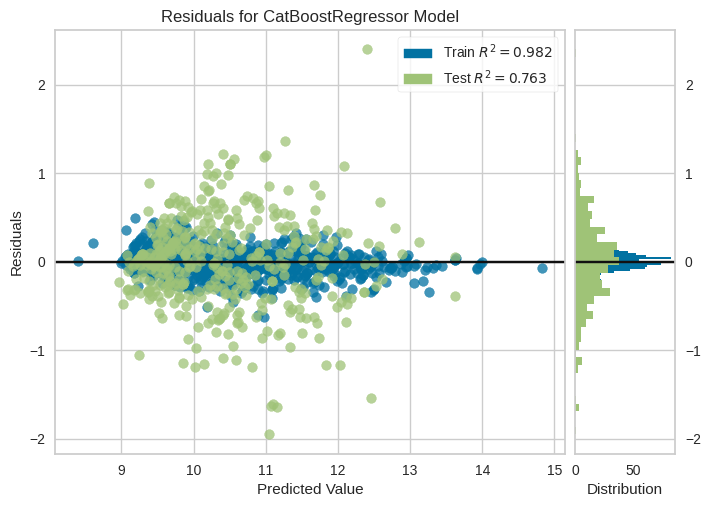

In [24]:
exp1.plot_model(tuned_catboost, plot ="residuals")

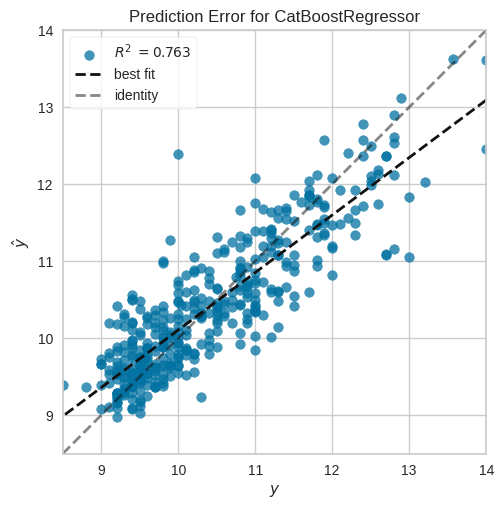

In [25]:
# plot error
exp1.plot_model(tuned_catboost, plot = 'error')

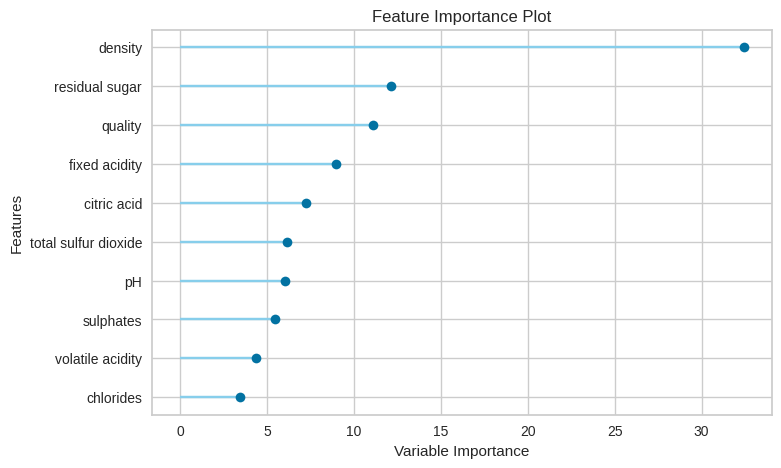

In [26]:
# plot feature importance
exp1.plot_model(tuned_catboost, plot = 'feature')

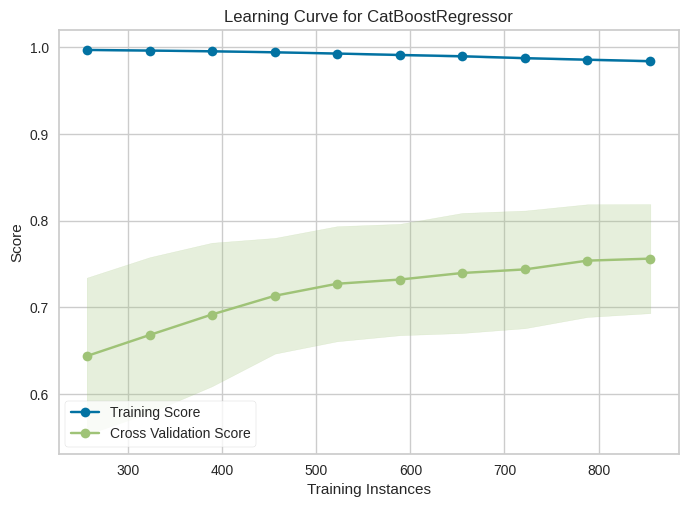

In [27]:
exp1.plot_model(tuned_catboost,plot='learning')

In [ ]:
#we can evaluate the model with different plot type.
exp1.evaluate_model(tuned_catboost)

interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Pipeline Plot', 'pipelin…

# **Interpret Model**

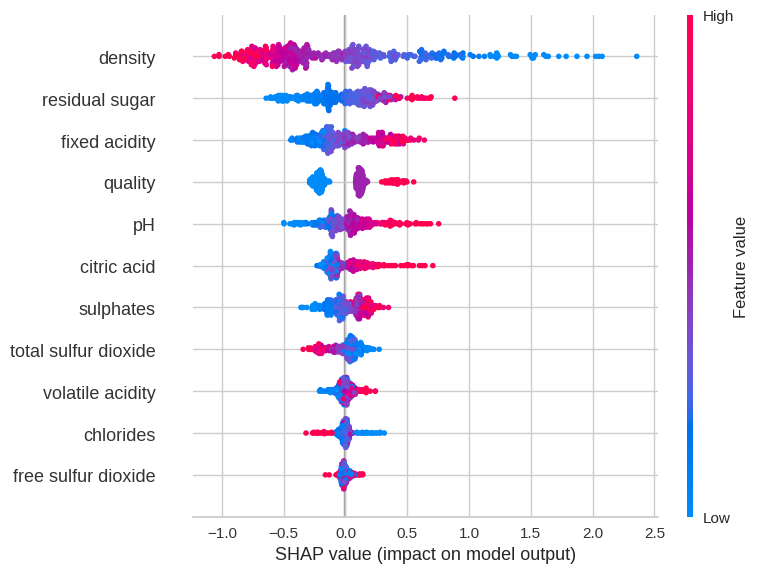

In [ ]:
exp1.interpret_model(tuned_catboost)

# **Blend Models**

Blending the top 3 models or our experiments

In [ ]:
Blended_Model = exp1.blend_models(Top3_exp1)
Blended_Model

,MAE,MSE,RMSE,R2,RMSLE,MAPE
Fold,,,,,,
0,0.4013,0.2741,0.5236,0.8038,0.0447,0.0379
1,0.4510,0.3537,0.5947,0.7403,0.0499,0.0418
2,0.4344,0.4925,0.7018,0.6670,0.0568,0.0400
3,0.3226,0.1763,0.4199,0.8499,0.0358,0.0302
4,0.3676,0.2500,0.5000,0.7982,0.0419,0.0342
5,0.3596,0.2217,0.4708,0.8062,0.0406,0.0342
6,0.3822,0.2581,0.5081,0.7496,0.0441,0.0369
7,0.3939,0.2857,0.5345,0.7065,0.0455,0.0371
8,0.4153,0.3161,0.5623,0.6644,0.0493,0.0401


Processing:   0%|          | 0/6 [00:00<?, ?it/s]

VotingRegressor(estimators=[('CatBoost Regressor',
                             <catboost.core.CatBoostRegressor object at 0x7ca2ff48c640>),
                            ('Light Gradient Boosting Machine',
                             LGBMRegressor(n_jobs=-1, random_state=123)),
                            ('Gradient Boosting Regressor',
                             GradientBoostingRegressor(random_state=123))],
                n_jobs=-1)

# **Stacking Models**

Stacking the top 3 models from our experiments

In [ ]:
Stacked_Model = exp1.stack_models(Top3_exp1)
Stacked_Model

,MAE,MSE,RMSE,R2,RMSLE,MAPE
Fold,,,,,,
0,0.3898,0.2635,0.5133,0.8115,0.0440,0.0370
1,0.4426,0.3482,0.5901,0.7443,0.0496,0.0411
2,0.4276,0.5006,0.7076,0.6615,0.0572,0.0393
3,0.3176,0.1745,0.4178,0.8514,0.0357,0.0298
4,0.3559,0.2329,0.4826,0.8120,0.0406,0.0332
5,0.3598,0.2181,0.4670,0.8094,0.0403,0.0344
6,0.3868,0.2580,0.5080,0.7497,0.0441,0.0373
7,0.3759,0.2563,0.5062,0.7368,0.0432,0.0354
8,0.4166,0.3353,0.5790,0.6441,0.0509,0.0405


Processing:   0%|          | 0/6 [00:00<?, ?it/s]

StackingRegressor(cv=5,
                  estimators=[('CatBoost Regressor',
                               <catboost.core.CatBoostRegressor object at 0x7ca2ff48e800>),
                              ('Light Gradient Boosting Machine',
                               LGBMRegressor(n_jobs=-1, random_state=123)),
                              ('Gradient Boosting Regressor',
                               GradientBoostingRegressor(random_state=123))],
                  final_estimator=LinearRegression(n_jobs=-1), n_jobs=-1)

The stacked_Model has improved the R2

# **Prediction**

Our best model is now the stacked_model

In [ ]:
# predict on test set
holdout_pred = exp1.predict_model(Stacked_Model)

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,Stacking Regressor,0.3890,0.2657,0.5155,0.7632,0.0442,0.0372


In [ ]:
# show predictions df
holdout_pred.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,quality,alcohol,prediction_label
912,10.0,0.46,0.44,2.9,0.065,4.0,8.0,0.99674,3.33,0.62,6,12.2,11.278081
772,9.5,0.57,0.27,2.3,0.082,23.0,144.0,0.99782,3.27,0.55,5,9.4,9.548407
1037,7.3,0.91,0.10,1.8,0.074,20.0,56.0,0.99672,3.35,0.56,5,9.2,9.401051
1106,8.2,0.23,0.42,1.9,0.069,9.0,17.0,0.99376,3.21,0.54,6,12.3,12.067684
263,7.9,0.37,0.23,1.8,0.077,23.0,49.0,0.99630,3.28,0.67,5,9.3,9.798446


The same function works for predicting the labels on unseen dataset. Let's create a copy of original data and drop the alcohol. We can then use the new data frame without labels for scoring.

In [ ]:
new_data = exp1.dataset.copy()
new_data.drop('alcohol', axis=1, inplace=True)
new_data.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,quality
374,14.0,0.410,0.63,3.8,0.089,6.0,47.0,1.00140,3.01,0.81,6
800,7.2,0.610,0.08,4.0,0.082,26.0,108.0,0.99641,3.25,0.51,5
1441,7.4,0.785,0.19,5.2,0.094,19.0,98.0,0.99713,3.16,0.52,6
1269,5.5,0.490,0.03,1.8,0.044,28.0,87.0,0.99080,3.50,0.82,8
691,9.2,0.920,0.24,2.6,0.087,12.0,93.0,0.99980,3.48,0.54,5


In [ ]:
# predict model on new_data
predictions = exp1.predict_model(Stacked_Model, data = new_data)
predictions.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,quality,prediction_label
374,14.0,0.410,0.63,3.8,0.089,6.0,47.0,1.00140,3.01,0.81,6,10.749901
800,7.2,0.610,0.08,4.0,0.082,26.0,108.0,0.99641,3.25,0.51,5,9.563185
1441,7.4,0.785,0.19,5.2,0.094,19.0,98.0,0.99713,3.16,0.52,6,9.531140
1269,5.5,0.490,0.03,1.8,0.044,28.0,87.0,0.99080,3.50,0.82,8,13.920062
691,9.2,0.920,0.24,2.6,0.087,12.0,93.0,0.99980,3.48,0.54,5,9.920273


# **Finalize Model**

In [ ]:
The_Final_Wining_Model= exp1.finalize_model(Stacked_Model)
The_Final_Wining_Model

Pipeline(memory=Memory(location=None),
         steps=[('numerical_imputer',
                 TransformerWrapper(include=['fixed acidity',
                                             'volatile acidity', 'citric acid',
                                             'residual sugar', 'chlorides',
                                             'free sulfur dioxide',
                                             'total sulfur dioxide', 'density',
                                             'pH', 'sulphates', 'quality'],
                                    transformer=SimpleImputer())),
                ('categorical_imputer',
                 TransformerWrapper(include=[],
                                    transformer=SimpleIm...
                                                             interaction_constraints=None,
                                                             learning_rate=None,
                                                             max_bin=None,
                                                             max_cat_threshold=None,
                                                             max_cat_to_onehot=None,
                                                             max_delta_step=None,
                                                             max_depth=None,
                                                             max_leaves=None,
                                                             min_child_weight=None,
                                                             missing=nan,
                                                             monotone_constraints=None,
                                                             multi_strategy=None,
                                                             n_estimators=None,
                                                             n_jobs=-1,
                                                             num_parallel_tree=None,
                                                             random_state=123, ...))],
                                   final_estimator=LinearRegression(n_jobs=-1),
                                   n_jobs=-1))])

# **Save Model**

In [ ]:
# save pipeline
exp1.save_model(The_Final_Wining_Model, 'my_pycaret_regression_pipeline')

Transformation Pipeline and Model Successfully Saved


(Pipeline(memory=Memory(location=None),
          steps=[('numerical_imputer',
                  TransformerWrapper(include=['fixed acidity',
                                              'volatile acidity', 'citric acid',
                                              'residual sugar', 'chlorides',
                                              'free sulfur dioxide',
                                              'total sulfur dioxide', 'density',
                                              'pH', 'sulphates', 'quality'],
                                     transformer=SimpleImputer())),
                 ('categorical_imputer',
                  TransformerWrapper(include=[],
                                     transformer=SimpleIm...
                                                              interaction_constraints=None,
                                                              learning_rate=None,
                                                              max_bin=None,
    

# **Loading Pipline**

In [ ]:
# load pipeline
My_Winning_Regressor = load_model('my_pycaret_regression_pipeline')
My_Winning_Regressor

Transformation Pipeline and Model Successfully Loaded


Pipeline(memory=Memory(location=None),
         steps=[('numerical_imputer',
                 TransformerWrapper(include=['fixed acidity',
                                             'volatile acidity', 'citric acid',
                                             'residual sugar', 'chlorides',
                                             'free sulfur dioxide',
                                             'total sulfur dioxide', 'density',
                                             'pH', 'sulphates', 'quality'],
                                    transformer=SimpleImputer())),
                ('categorical_imputer',
                 TransformerWrapper(include=[],
                                    transformer=SimpleIm...
                                                             interaction_constraints=None,
                                                             learning_rate=None,
                                                             max_bin=None,
                                                             max_cat_threshold=None,
                                                             max_cat_to_onehot=None,
                                                             max_delta_step=None,
                                                             max_depth=None,
                                                             max_leaves=None,
                                                             min_child_weight=None,
                                                             missing=nan,
                                                             monotone_constraints=None,
                                                             multi_strategy=None,
                                                             n_estimators=None,
                                                             n_jobs=-1,
                                                             num_parallel_tree=None,
                                                             random_state=123, ...))],
                                   final_estimator=LinearRegression(n_jobs=-1),
                                   n_jobs=-1))])